# Project Name : PREDICTIVE CUSTOMER BEHAVIOUR MODELLING USING AI

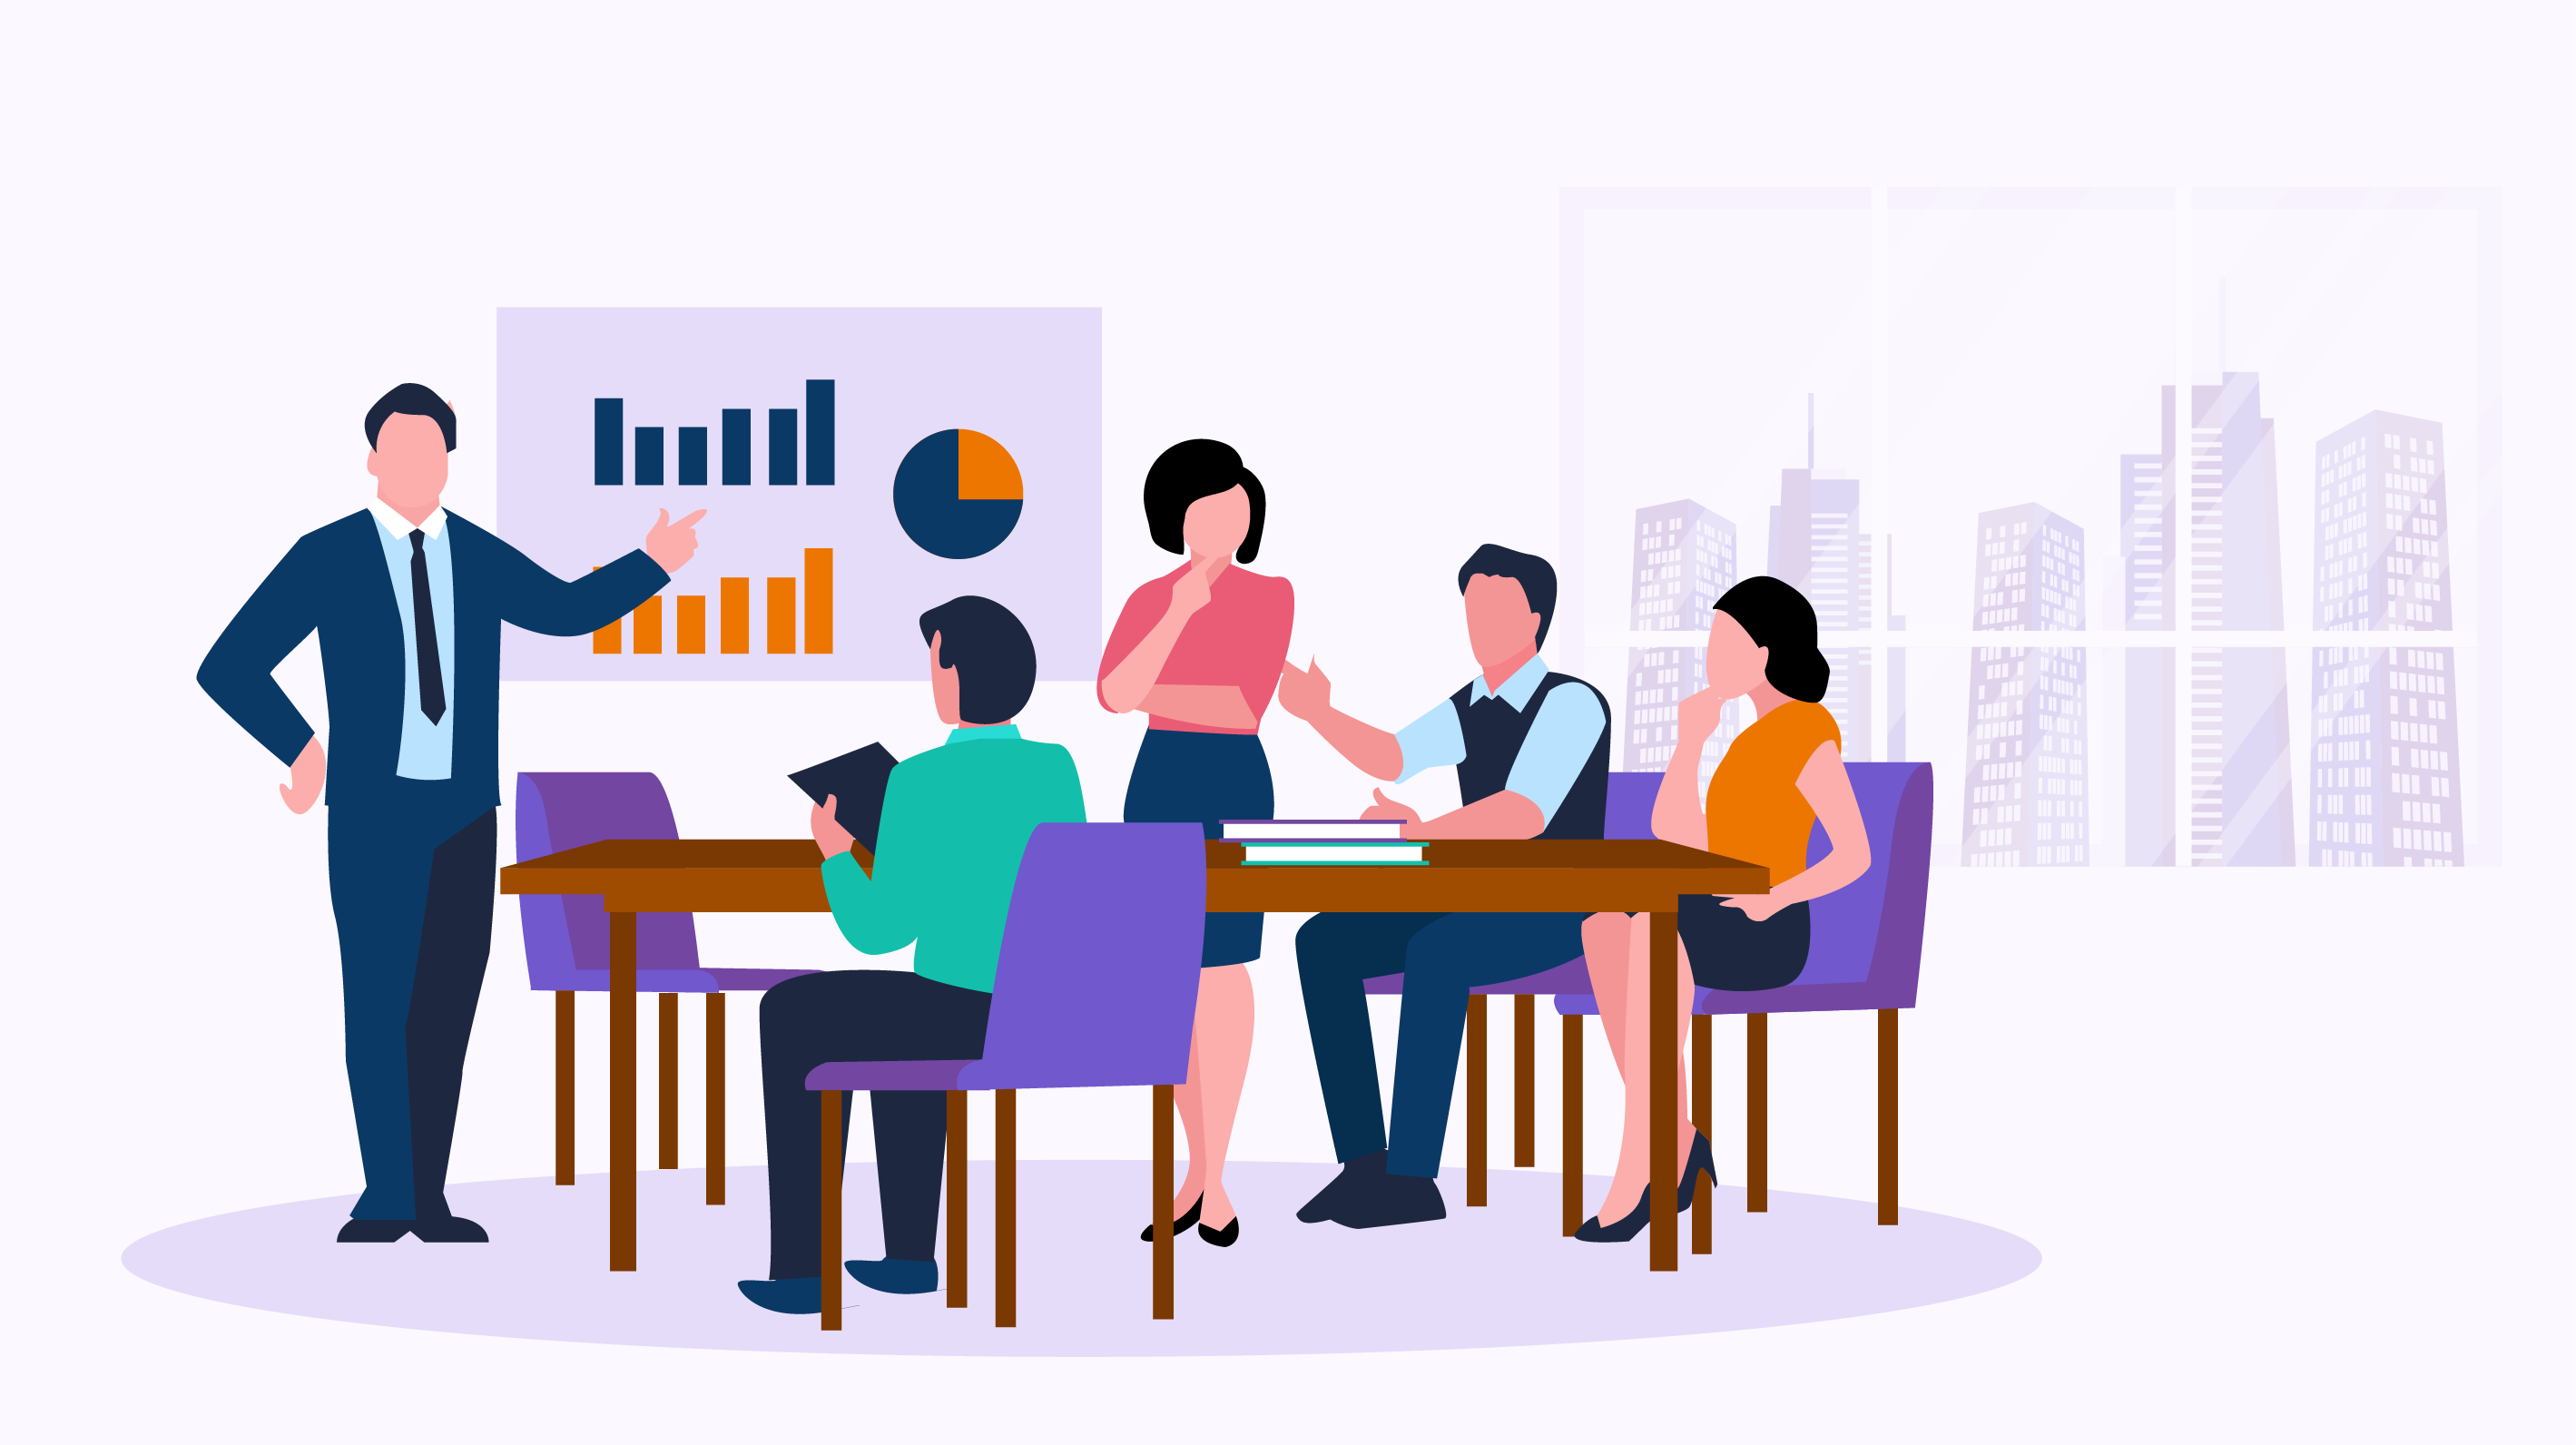

Predictive Customer Behavior Modelling Using AI is an in-depth analysis of a company’s ideal customers. This approach enables businesses to gain a clearer understanding of their audience, making it easier to adapt products to meet the unique needs, preferences, and concerns of various customer groups.
By leveraging predictive behavior modelling, organizations can tailor their offerings based on distinct customer segments. For example, instead of investing resources to promote a new product to every individual in the company’s database, the business can identify which segment is most likely to purchase the product and focus its marketing efforts on that specific group.

### Time Line of the project :
- Importing Libraries
- Data Analysis
- Data Cleaning and Feature Engineering
- Performing Clustering

#### Importing Libraries

In [1]:
import pandas as pd ## analysis
import numpy as np ## comptutational ability
import seaborn as sns 
import matplotlib.pyplot as plt  ## visualization
%matplotlib inline

In [2]:
df= pd.read_csv("Customer_Analytics_DB.csv",sep='\t')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Data Analysis

Null Values

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
mean= df['Income'].mean()
df['Income']= df['Income'].fillna(mean)

Let us create a new column Age by using year of birth

In [9]:
df['Age']= 2022-df['Year_Birth']

In [10]:
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

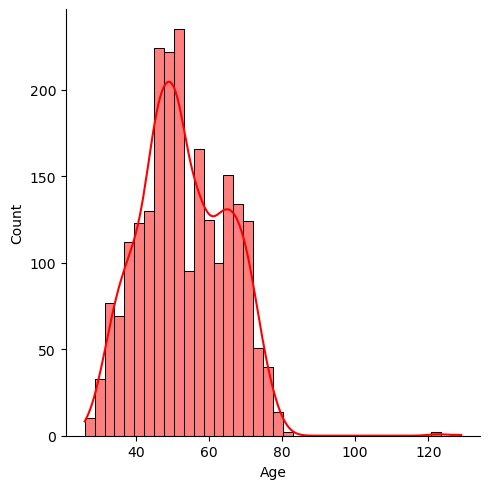

In [11]:
sns.displot(df['Age'], color='red', kde=True)
plt.show()

In [12]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

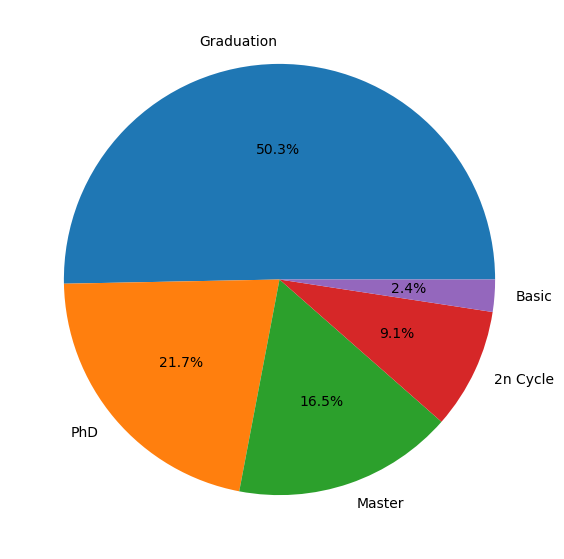

In [13]:
plt.figure(figsize=(7,7))
ed = df['Education'].value_counts()
plt.pie(ed,autopct='%.1f%%',labels=[ed.index[0],ed.index[1],ed.index[2],ed.index[3],ed.index[4]])
plt.show()

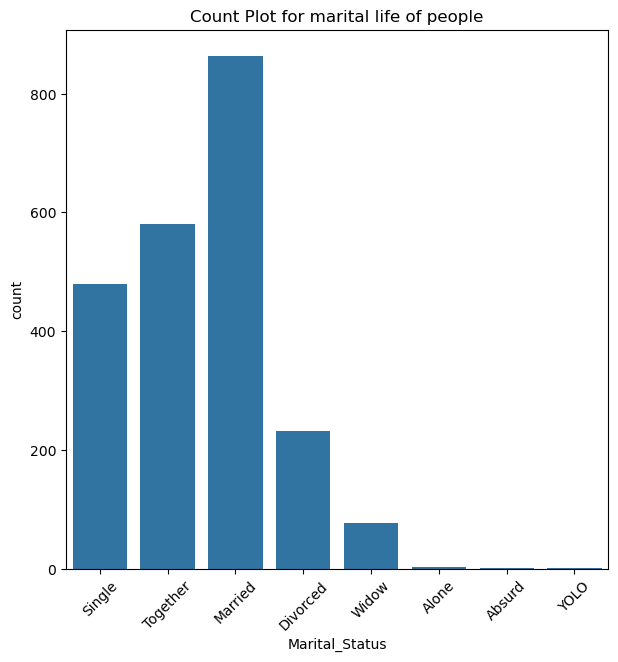

In [14]:
# Create a figure with specified size
plt.figure(figsize=(7, 7))

# Create the count plot
ms = sns.countplot(x='Marital_Status', data=df)

# Modify the x-tick labels
ms.tick_params(axis='x', rotation=45)

# Set the title of the plot
plt.title("Count Plot for marital life of people")

# Display the plot
plt.show()

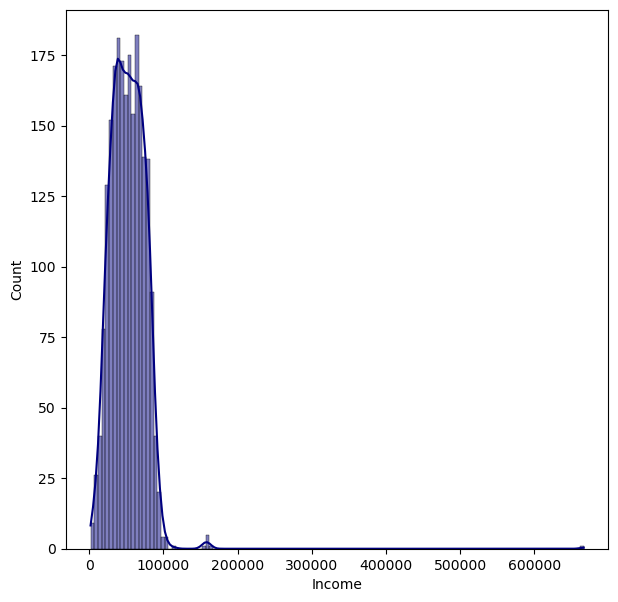

In [15]:

# Create a figure with specified size
plt.figure(figsize=(7, 7))

# Create the histogram plot using histplot
sns.histplot(df['Income'], color='navy', kde=True)

# Display the plot
plt.show()


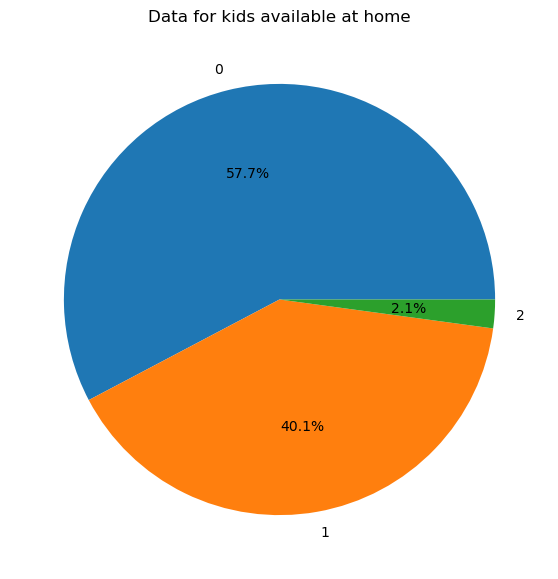

In [16]:
plt.figure(figsize=(7,7))
kid = df['Kidhome'].value_counts()
plt.pie(kid,autopct='%.1f%%',labels=[kid.index[0],kid.index[1],kid.index[2]])
plt.title("Data for kids available at home")
plt.show()

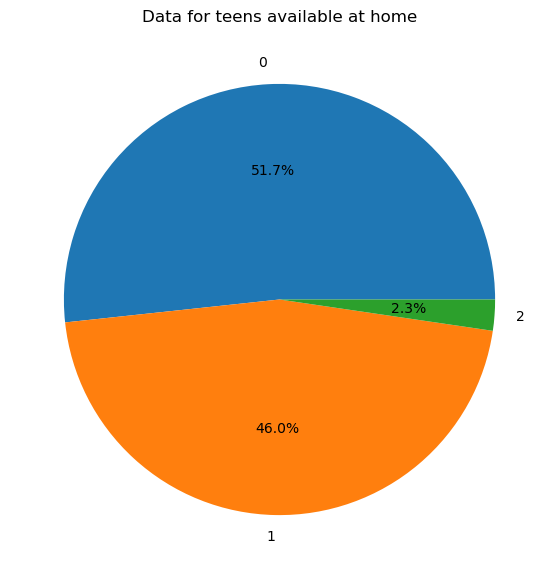

In [17]:
plt.figure(figsize=(7,7))
teen= df['Teenhome'].value_counts()
plt.pie(teen,autopct='%.1f%%',labels=[teen.index[0],teen.index[1],teen.index[2]])
plt.title("Data for teens available at home")
plt.show()

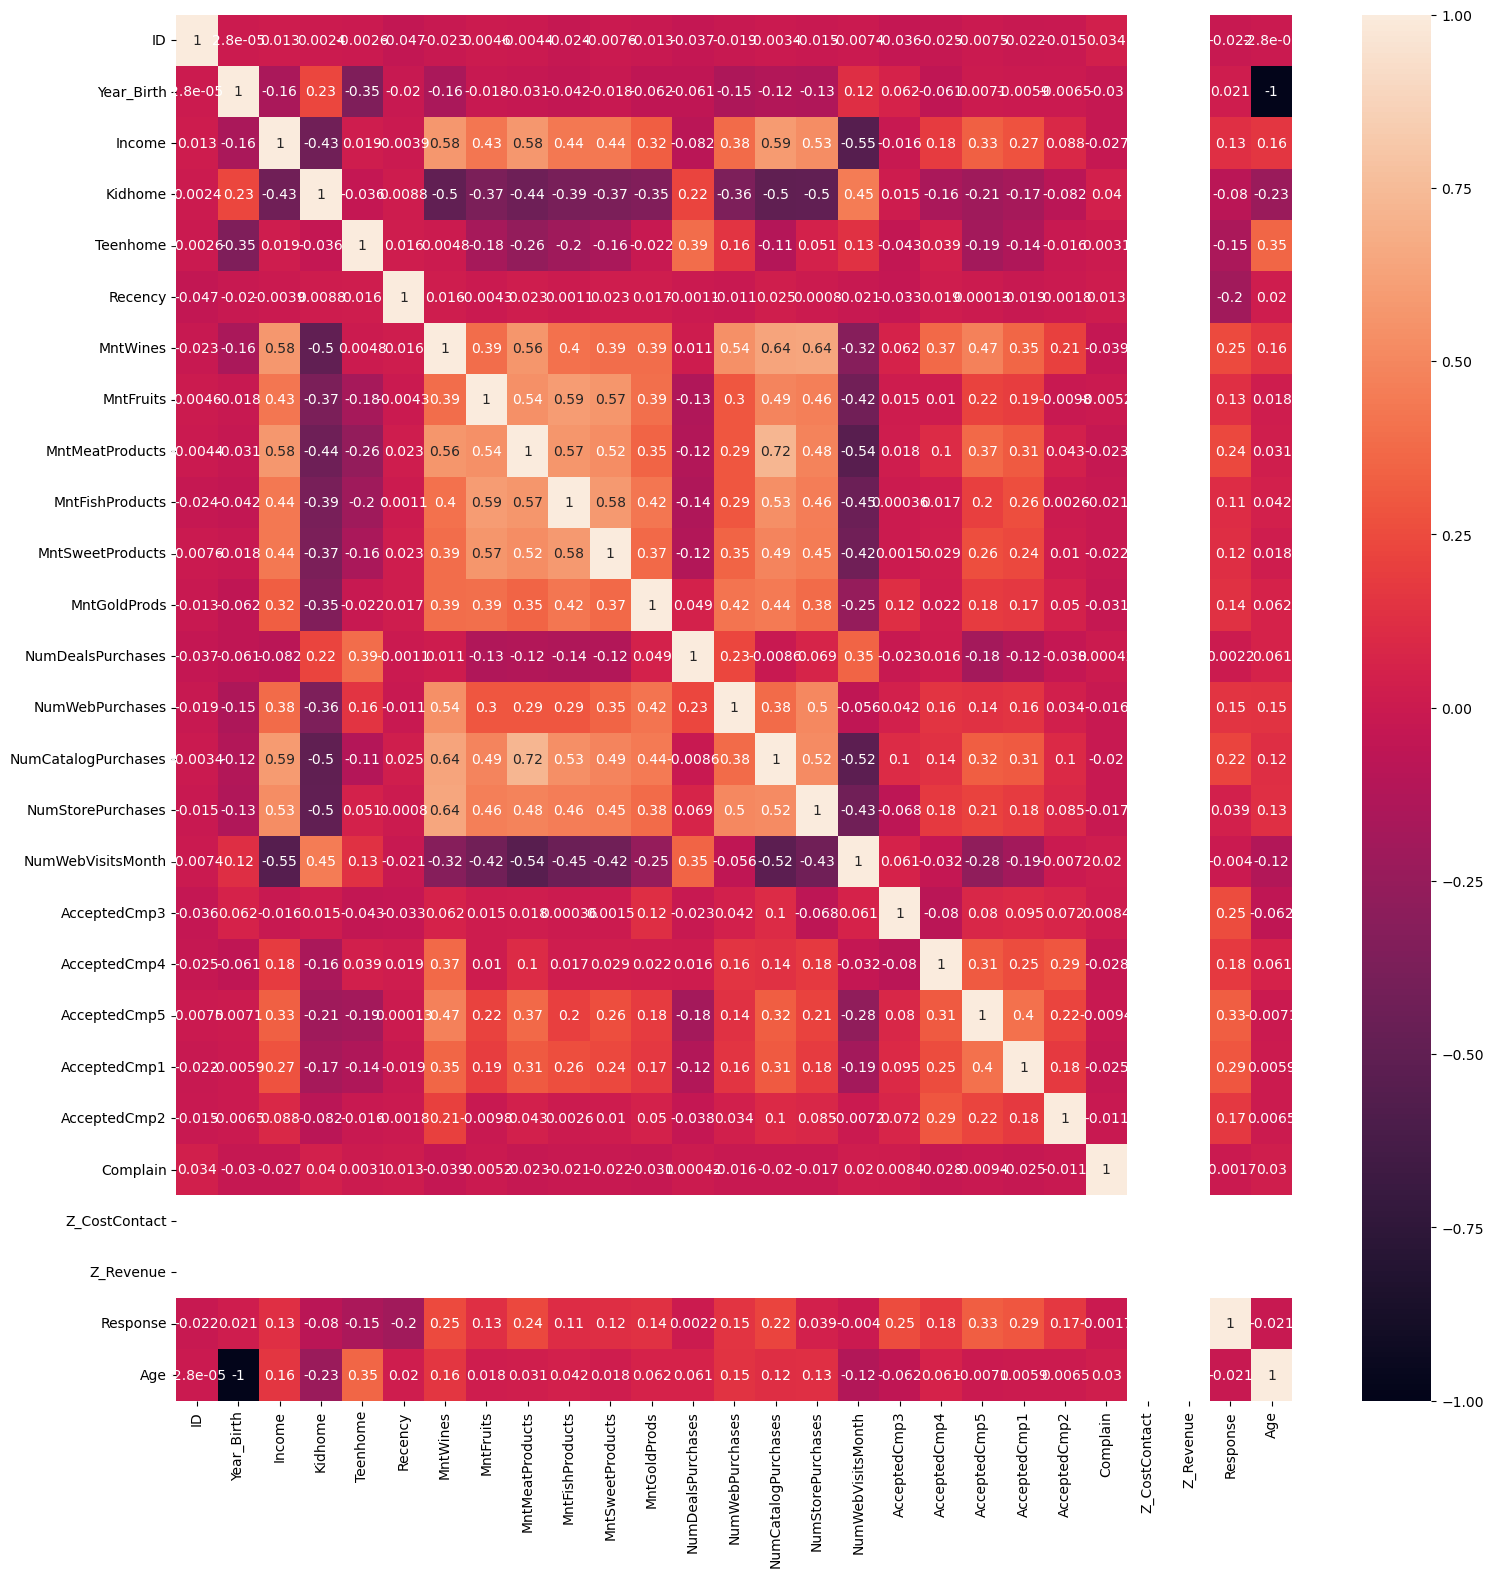

In [18]:

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(numeric_df.corr(), annot=True)

plt.show()


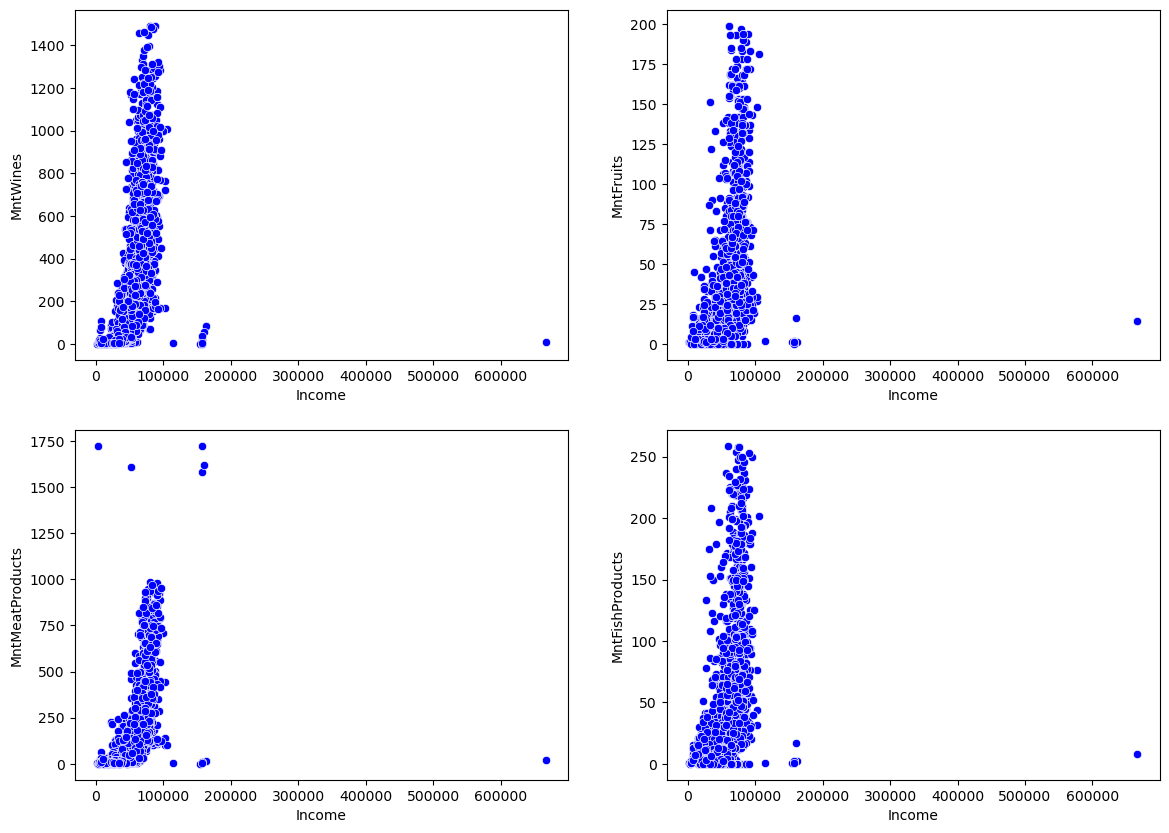

In [19]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df,x='Income',y='MntWines',color='blue')
plt.subplot(2,2,2)
sns.scatterplot(data=df,x='Income',y='MntFruits',color='blue')
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='Income',y='MntMeatProducts',color='blue')
plt.subplot(2,2,4)
sns.scatterplot(data=df,x='Income',y='MntFishProducts',color='blue')
plt.show()

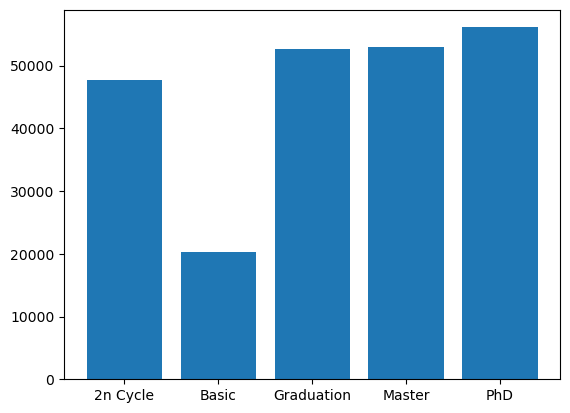

In [20]:
education_income= df.groupby('Education')['Income'].mean()

plt.bar(education_income.index,height=round(education_income,2))
plt.show()

## Data Cleaning and Feature Engineering

In [21]:
mean

52247.25135379061

In [22]:
df= df.dropna()  ## we replaced the income null values with avg or mean of income

In [23]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

Creating extra features like total money spent, family size

In [24]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [25]:

# Replace values in "Marital_Status" column and create "Relation" column
df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1}).astype(int)

# Create "Children" column by summing "Kidhome" and "Teenhome"
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Create "Family_Size" column by summing "Relation" and "Children"
df["Family_Size"] = df["Relation"] + df["Children"]

print(df)


         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  \
0            0  04-09-2012       58       635  ...       

C:\Users\ChatterjeeSo\AppData\Local\Temp\ipykernel_28452\3846774764.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1}).astype(int)


In [26]:
df= df.drop(['Relation','Children'],axis=1)

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spent', 'Family_Size'],
      dtype='object')

Label Encoding categorical data i.e. Education data

In [28]:
from sklearn.preprocessing import LabelEncoder ## one hot encoding
from sklearn.preprocessing import StandardScaler  ## scale the values based on mean of the data

In [29]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [30]:
lb = LabelEncoder()
df['Education']= lb.fit_transform(df['Education'])

In [31]:
df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

Scaling Data

In [32]:
df1 = df.copy()
to_drop = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1","AcceptedCmp2", "Complain", "Response", ]
df1 = df1.drop(to_drop, axis=1)

In [33]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_Spent,Family_Size
0,5524,1957,2,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,3,11,65,1617,1
1,2174,1954,2,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,3,11,68,27,3
2,4141,1965,2,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,3,11,57,776,2
3,6182,1984,2,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,3,11,38,53,3
4,5324,1981,4,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,3,11,41,422,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Married,61223.0,0,1,13-06-2013,46,709,...,2,9,3,4,5,3,11,55,1341,3
2236,4001,1946,4,Together,64014.0,2,1,10-06-2014,56,406,...,7,8,2,5,7,3,11,76,444,5
2237,7270,1981,2,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,2,3,13,6,3,11,41,1241,1
2238,8235,1956,3,Together,69245.0,0,1,24-01-2014,8,428,...,2,6,5,10,3,3,11,66,843,3


In [34]:
scaler = StandardScaler()
#scaled_feature = scaler.fit_transform(df.values)
#scaled_df = pd.DataFrame(scaled_feature, index=df.index, columns=df.columns)

In [35]:
df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

## Aproach 1: Unsupervised Learning

## Perform Clustering

We will use the Elbob method to find the optimum number of clusters

In [36]:
!pip install yellowbrick
#

In [37]:
import os
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [38]:
df= df.drop(['Marital_Status','Dt_Customer'],axis=1)

C:\Users\ChatterjeeSo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\ChatterjeeSo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\ChatterjeeSo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\ChatterjeeSo\AppData\Local\anaconda3\Lib\site-packages\sklearn\c

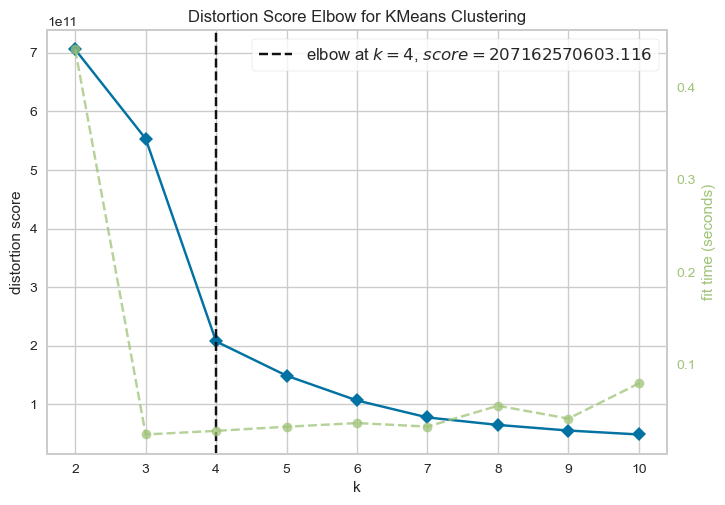

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:

# Set the environment variables to avoid the warnings
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
os.environ["OMP_NUM_THREADS"] = "9"

em = KElbowVisualizer(KMeans(), k=10)
em.fit(df)
em.show()

We see that the optimum number of clusters that should be used is k=4

We will use K Means Clutering for the operation

In [40]:
from sklearn.cluster import KMeans

In [41]:
os.environ["OMP_NUM_THREADS"] = "9"
kmc = KMeans(n_clusters=4)
# fit model and predict clusters
pred = kmc.fit_predict(df)
df["Clusters"] = pred

C:\Users\ChatterjeeSo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [42]:
df['Clusters']

0       3
1       3
2       0
3       1
4       3
       ..
2235    3
2236    3
2237    3
2238    0
2239    3
Name: Clusters, Length: 2240, dtype: int32

Let us visualize our Clusters

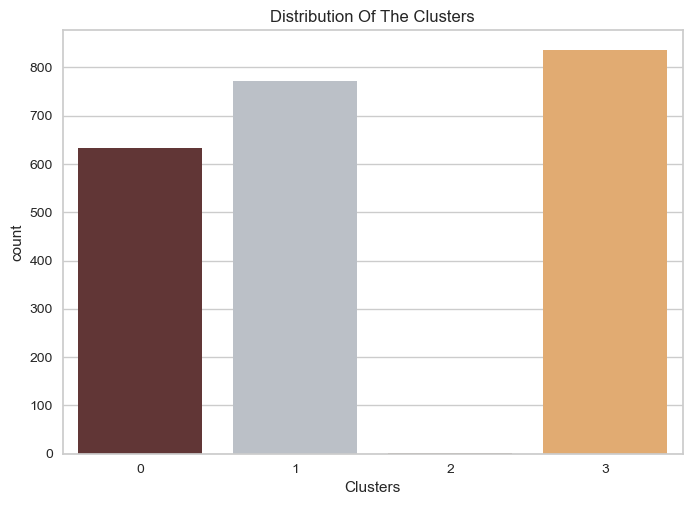

In [43]:

# Define the palette
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Plot the countplot with hue set to the same variable as x and legend set to False
fig = sns.countplot(x="Clusters", hue="Clusters", palette=pal, data=df, legend=False)
fig.set_title("Distribution Of The Clusters")
plt.show()


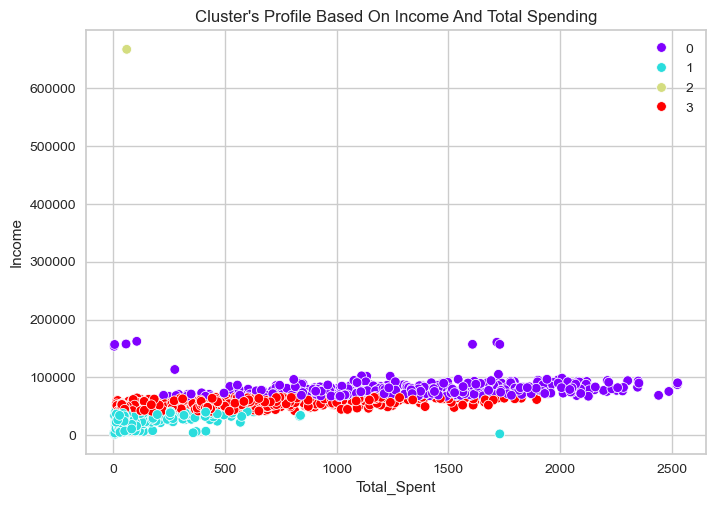

In [44]:
fig = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette="rainbow")
fig.set_title("Cluster's Profile Based On Income And Total Spending")
plt.legend()
plt.show()

## Approach 2 : Supervised Learning

In [45]:
y=df['Response'] ## dependent var
X_new=df.drop(['Response','Education'],axis=1) ## independent var

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1792, 29)
Shape of y_train =  (1792,)
Shape of X_test =  (448, 29)
Shape of y_test =  (448,)


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
classifier.score(X_test, y_test)

0.84375

### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8504464285714286

### Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf= RandomForestClassifier()

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
rf.score(X_test,y_test)

0.8973214285714286

# Customer Lifetime Value (CLV) Prediction Module

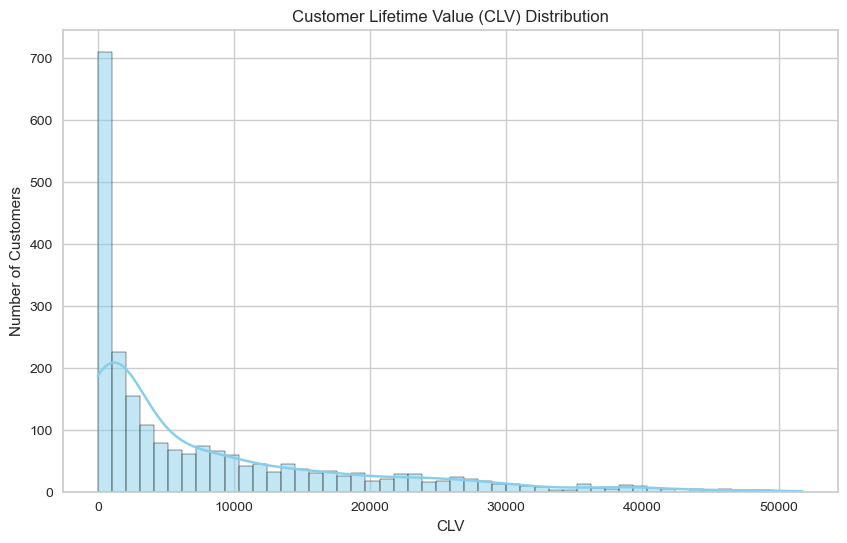

C:\Users\ChatterjeeSo\AppData\Local\Temp\ipykernel_28452\1656866214.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLV_Segment', data=df, palette='viridis')


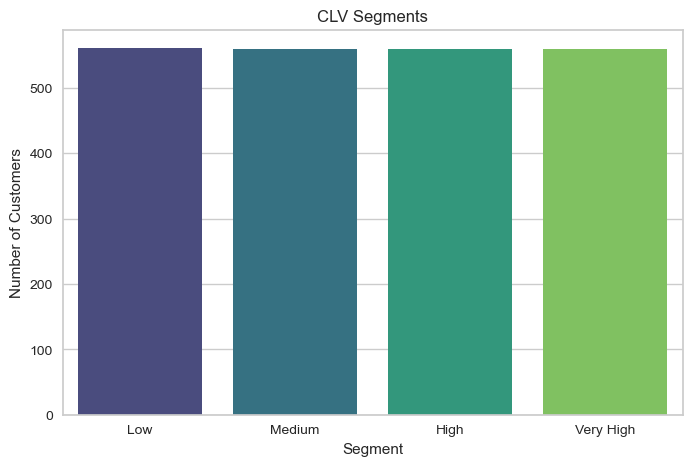

CLV Segment Profiles:
              Total_Spent  Total_Purchases    Income       CLV
CLV_Segment                                                  
Low                57.87             4.87  34231.68    298.60
Medium            293.33             9.24  45454.45   1716.93
High              728.90            16.07  58703.37   7183.52
Very High        1343.52            19.97  70619.55  23216.69

Top 5 High-CLV Customers:
        ID      CLV CLV_Segment  Total_Spent  Total_Purchases   Income
1601  5453  51744.0   Very High         2352               23  90226.0
1010  5236  50462.0   Very High         2194               20  77568.0
1280  3698  48990.0   Very High         2130               18  78687.0
248   8867  48898.0   Very High         2126               19  67546.0
1890  2747  48898.0   Very High         2126               19  67546.0


C:\Users\ChatterjeeSo\AppData\Local\Temp\ipykernel_28452\1656866214.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_profile = df.groupby('CLV_Segment')[['Total_Spent', 'Total_Purchases', 'Income', 'CLV']].mean().round(2)


In [55]:
# --- Customer Lifetime Value (CLV) Prediction Module ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (adjust the path if needed)
df = pd.read_csv('Customer_Analytics_DB.csv', sep='\t')

# --- Feature Engineering ---

# Fill missing income values with mean (if not already done)
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Calculate Total_Spent per customer
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spent'] = df[product_cols].sum(axis=1)

# Calculate Purchase Frequency (total purchases across all channels)
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Estimate Customer Lifespan (in months) using Dt_Customer and Recency
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')
max_date = df['Dt_Customer'].max()
df['Customer_Lifespan_Months'] = ((max_date - df['Dt_Customer']).dt.days // 30) + 1

# --- CLV Calculation ---
# Simple CLV formula: Average Purchase Value × Purchase Frequency × Lifespan
df['Avg_Purchase_Value'] = df['Total_Spent'] / (df['Total_Purchases'].replace(0, np.nan))
df['CLV'] = df['Avg_Purchase_Value'] * df['Total_Purchases'] * df['Customer_Lifespan_Months']
df['CLV'] = df['CLV'].fillna(0)

# --- CLV Segmentation ---
# Segment customers into quartiles based on CLV
df['CLV_Segment'] = pd.qcut(df['CLV'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# --- Visualization ---

plt.figure(figsize=(10, 6))
sns.histplot(df['CLV'], bins=50, kde=True, color='skyblue')
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('CLV')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='CLV_Segment', data=df, palette='viridis')
plt.title('CLV Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# --- Segment Profile Table ---
segment_profile = df.groupby('CLV_Segment')[['Total_Spent', 'Total_Purchases', 'Income', 'CLV']].mean().round(2)
print("CLV Segment Profiles:\n", segment_profile)

# --- Insights ---
print("\nTop 5 High-CLV Customers:")
print(df[['ID', 'CLV', 'CLV_Segment', 'Total_Spent', 'Total_Purchases', 'Income']].sort_values('CLV', ascending=False).head())

# --- Optional: Save results ---
# df.to_csv('customer_clv_results.csv', index=False)